# Evaluation vis

- Plotting loss curves.
- Plotting RMSD and HDD curves.
- Plotting distributions.
- Generating CIFs.

In [1]:
from eval_utils import *
import torch, os
from bin.generate_samples import generate_samples, SampleDefaults, get_data
from crystallm import CIFTokenizer, GPT, GPTConfig

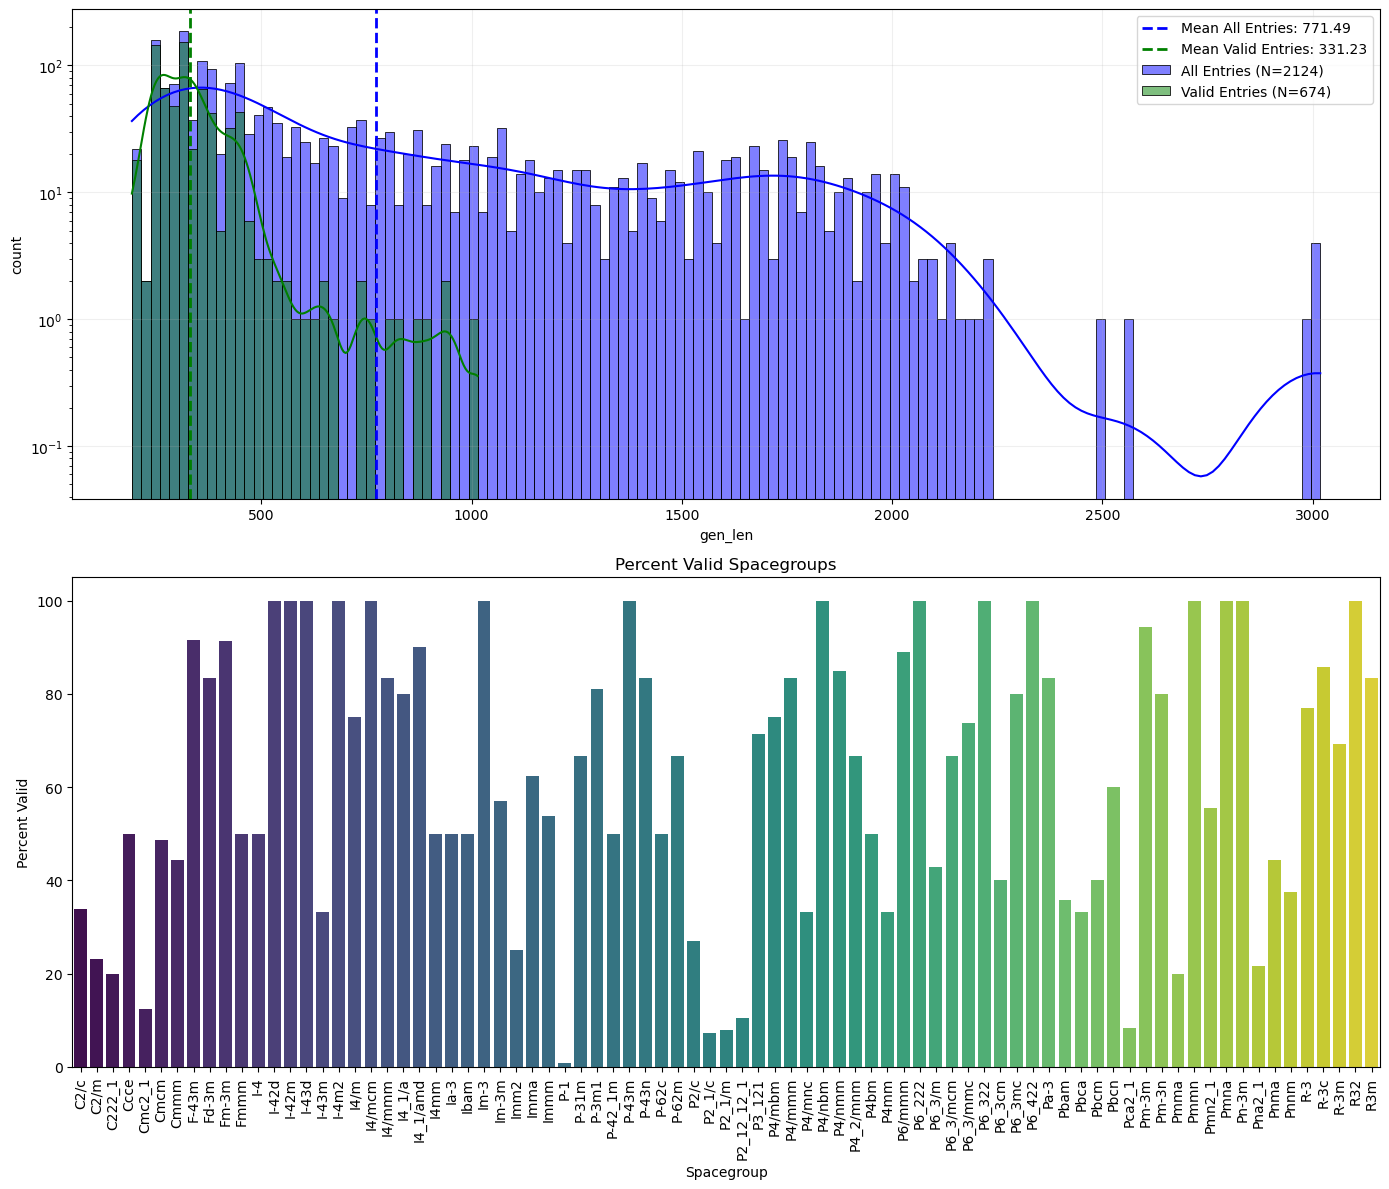

In [5]:
plot_disitributions(
    'eval_CHILI-100K_nooxi_dedup_nocond_scratch_on_CHILI-100K_test.csv', 
    kde=True, 
    stat='count',
    log_scale=True,
    bins=128
)

In [16]:
check = torch.load('CHILI-100K_nocond_scratch_large/ckpt.pt', map_location='cpu')

In [18]:
check['config']

{'out_dir': 'CHILI-100K_nocond_scratch_large',
 'eval_interval': 50,
 'log_interval': 1,
 'eval_iters_train': 200,
 'eval_iters_val': 200,
 'eval_only': False,
 'always_save_checkpoint': True,
 'init_from': 'scratch',
 'dataset': 'datasets/CHILI-100K_nooxi_dedup_nocond',
 'gradient_accumulation_steps': 40,
 'batch_size': 16,
 'block_size': 1024,
 'accumulative_pbar': False,
 'use_lora': False,
 'lora_proj': False,
 'lora_mlp': False,
 'lora_rank': 2,
 'n_layer': 16,
 'n_head': 16,
 'n_embd': 1024,
 'dropout': 0.1,
 'bias': False,
 'learning_rate': 0.001,
 'max_iters': 100000,
 'weight_decay': 0.1,
 'beta1': 0.9,
 'beta2': 0.99,
 'grad_clip': 1.0,
 'decay_lr': True,
 'warmup_iters': 100,
 'lr_decay_iters': 100000,
 'min_lr': 0.0001,
 'device': 'cuda',
 'dtype': 'float16',
 'compile': True,
 'underrep_p': 0.0,
 'validate': True,
 'validate_generation': False,
 'validate_generation_start_iter': 0,
 'gen_iters_train': 2,
 'gen_iters_val': 2,
 'gen_max_new_tokens': 1000,
 'gen_top_k': 5,
 '

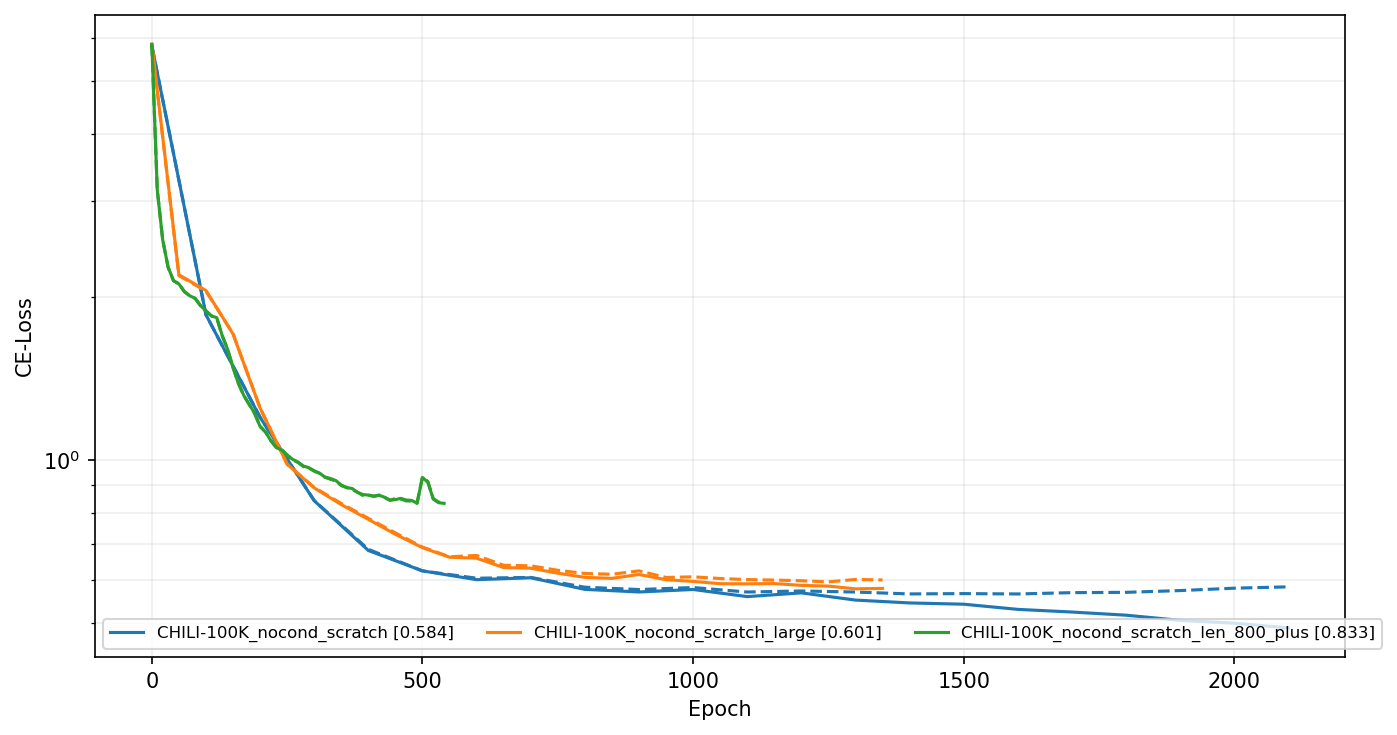

In [4]:
plot_curves(
    [
        'CHILI-100K_nocond_scratch/ckpt.pt',
        'CHILI-100K_nocond_scratch_large/ckpt.pt',
        'CHILI-100K_nocond_scratch_len_800_plus/ckpt.pt',
    ],
    ylog = True,
    xlog = False,
    plot_metrics = False,
)

In [5]:
config = SampleDefaults()
config.device = 'cuda'

config.model_dir = 'CHILI-100K_nocond_scratch_large/'
config.dataset_dir = 'datasets/CHILI-100K_nocond/'
config.split = 'train'

config.debug_max = 1
config.n_repeats = 1

config.top_k = None
config.max_new_tokens = 3000
config.cond_window = 900

config.add_composition = True
config.add_spacegroup = True
config.fit_xrd = False
config.plot_xrd = False

if False:
    config.post_process = True
    config.out = "generation_out_test.tar.gz"
    config.individual_cifs = True

generate_samples(config)

number of total parameters: 201.74M
------------------------------
1517598
------------------------------
Generation no. 1 :
data_Mn2H32C32N4O20
loop_
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Mn 1.5500 1.4000 0.6483
H 2.2000 0.2500 0.0000
C 2.5500 0.7000 0.3000
N 3.0400 0.6500 0.6300
O 3.4400 0.6000 1.2600
_symmetry_space_group_name_H-M P2/c
_cell_length_a 7.2000
_cell_length_b 6.1400
_cell_length_c 17.1161
_cell_angle_alpha 90.0000
_cell_angle_beta 101.8700
_cell_angle_gamma 90.0000
_symmetry_Int_Tables_number 13
_chemical_formula_structural MnH16C13(NO5)2
_chemical_formula_sum 'Mn2 H32 C32 N4 O20'
_cell_volume 770.3172
_cell_formula_units_Z 2
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Mn Mn0 2 0.0000 0.2460 0.2500 1.0
H H1 4 0.1179 0.1437 0.3114 1.0
H H

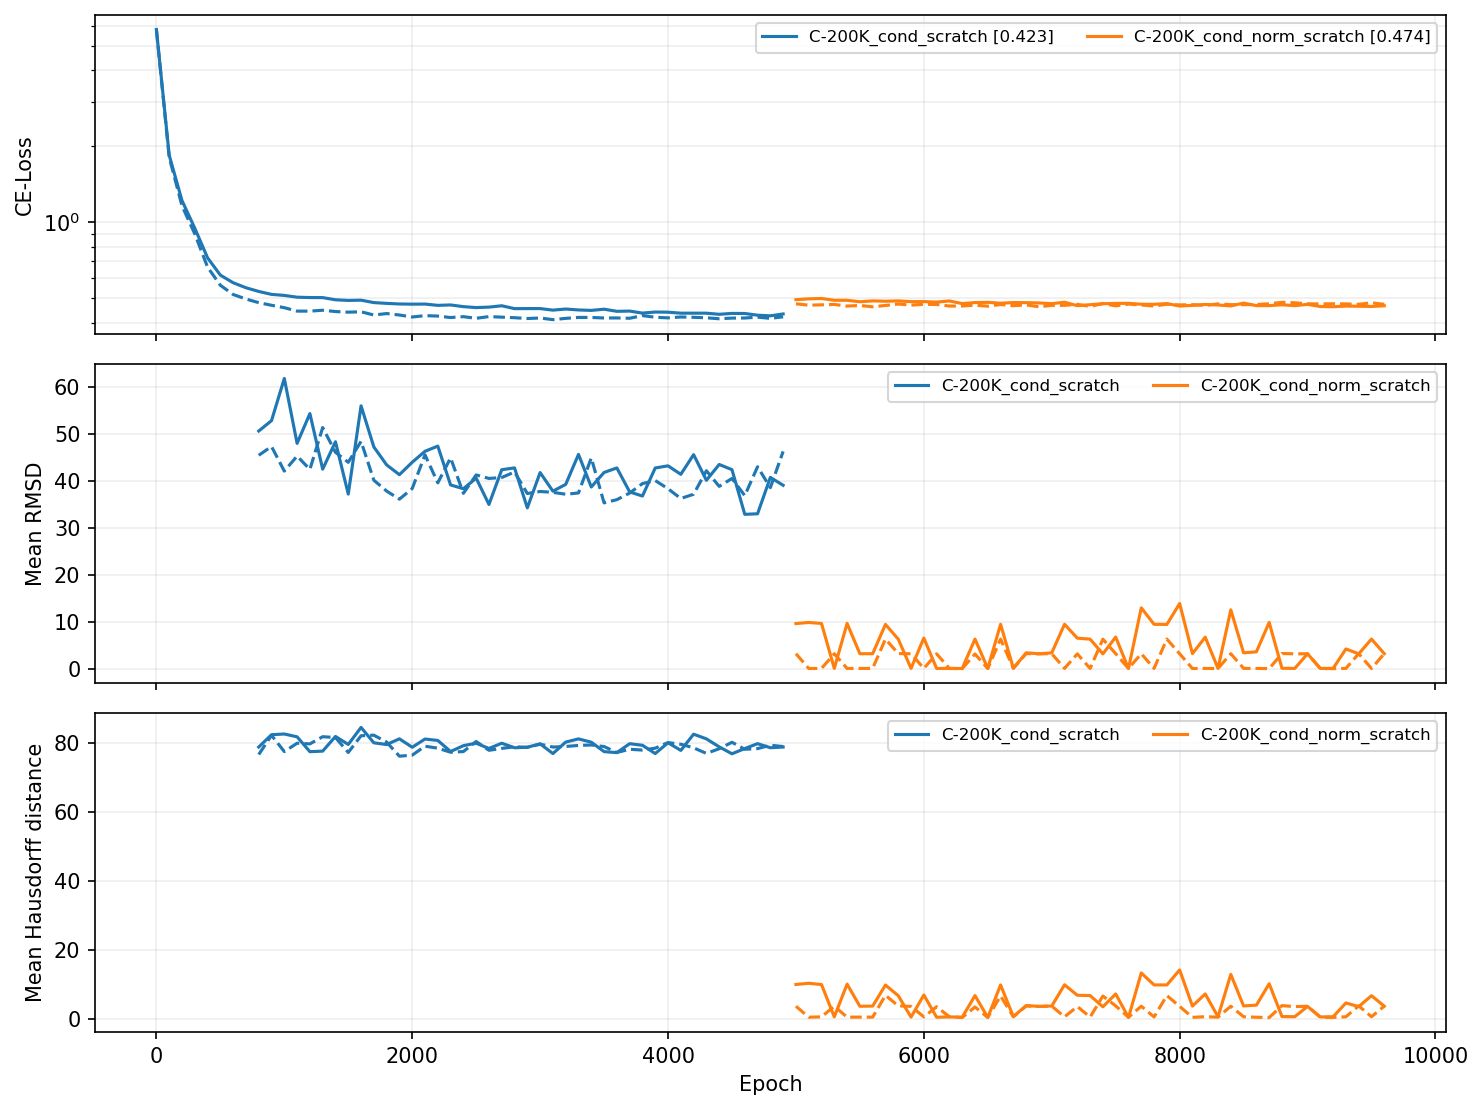

In [18]:
plot_curves(
    [
        'C-200K_cond_scratch/ckpt.pt',
        'C-200K_cond_norm_scratch/ckpt.pt',
    ],
    ylog = True,
    xlog = False,
    plot_metrics = True,
)

number of total parameters: 25.36M
------------------------------
ZincBlende_SbO
------------------------------
Generation no. 1 :
2.2553,1.0000
2.6042,0.3665
3.6828,0.4182
4.3185,0.3962
4.5105,0.0904
5.2083,0.0636
5.6756,0.1689
data_Sb4O4
loop_
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Sb 2.0500 1.4500 0.8300
O 3.4400 0.6000 1.2600
_symmetry_space_group_name_H-M F-43m
_cell_length_a 4.8255
_cell_length_b 4.8255
_cell_length_c 4.8255
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 90.0000
_symmetry_Int_Tables_number 216
_chemical_formula_structural SbO
_chemical_formula_sum 'Sb4 O4'
_cell_volume 112.4336
_cell_formula_units_Z 4
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Sb Sb0 4 0.2500 0.2500 0.7500 1
O O1 4 0.0000 0.0000 0.0000 1



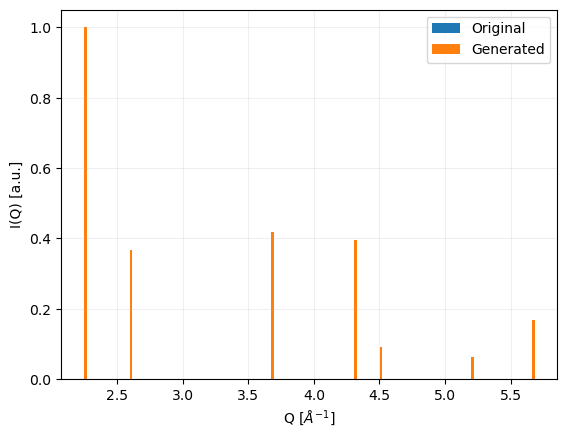


RMSD: 3.478673791779813e-05
HDD: 3.478673791779813e-05

------------------------------
Wurtzite_CaO
------------------------------
Generation no. 1 :
1.8363,0.7933
1.9511,0.5249
2.0794,1.0000
2.6794,0.3048
3.1806,0.5675
3.4551,0.5586
3.6726,0.0837
3.7313,0.3881
3.8000,0.1527
4.1587,0.0648
4.6961,0.1724
4.8584,0.0564
4.9554,0.1201
5.0343,0.0551
5.2121,0.1164
5.2355,0.0548
5.5089,0.0717
5.6718,0.1763
data_Ca2O2
loop_
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Ca 1.0000 1.8000 1.1400
O 3.4400 0.6000 1.2600
_symmetry_space_group_name_H-M P6_3mc
_cell_length_a 3.9510
_cell_length_b 3.9510
_cell_length_c 6.8432
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 120.0000
_symmetry_Int_Tables_number 186
_chemical_formula_structural CaO
_chemical_formula_sum 'Ca2 O2'
_cell_volume 93.5523
_cell_formula_units_Z 2
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_a

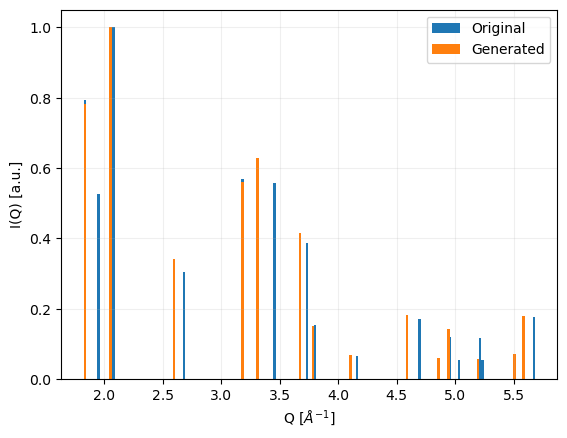


RMSD: 0.09952332842874317
HDD: 0.09952332842874317

------------------------------
AntiFluorite_Al2O
------------------------------
Generation no. 1 :
2.1437,0.1839
2.4754,0.4333
3.5007,1.0000
4.2874,0.1216
4.9507,0.1455
5.5351,0.1695
data_Al8O4
loop_
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Al 1.6100 1.2500 0.6750
O 3.4400 0.6000 1.2600
_symmetry_space_group_name_H-M Fm-3m
_cell_length_a 5.0766
_cell_length_b 5.0766
_cell_length_c 5.0766
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 90.0000
_symmetry_Int_Tables_number 225
_chemical_formula_structural Al2O
_chemical_formula_sum 'Al8 O4'
_cell_volume 130.3363
_cell_formula_units_Z 4
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Al Al0 8 0.2500 0.2500 0.2500 1
O O1 4 0.0000 0.0000 0.000

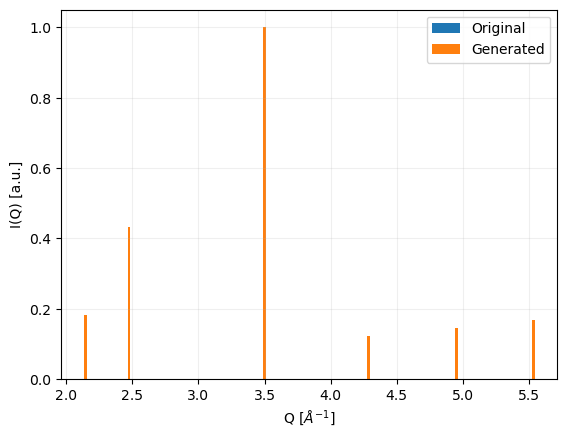


RMSD: 2.9075729796297493e-05
HDD: 2.9075729796297493e-05

------------------------------
RockSalt_IrO
------------------------------
Generation no. 1 :
2.4684,1.0000
2.8502,0.7061
4.0308,0.4704
4.7266,0.4262
4.9367,0.1583
5.7005,0.0787
data_Ir4O4
loop_
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Ir 2.2000 1.3500 0.7650
O 3.4400 0.6000 1.2600
_symmetry_space_group_name_H-M Fm-3m
_cell_length_a 4.4090
_cell_length_b 4.4090
_cell_length_c 4.4090
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 90.0000
_symmetry_Int_Tables_number 225
_chemical_formula_structural IrO
_chemical_formula_sum 'Ir4 O4'
_cell_volume 85.1326
_cell_formula_units_Z 4
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Ir Ir0 4 0.0000 0.0000 0.0000 1
O O1 4 0.0000 0.0000 0.5000

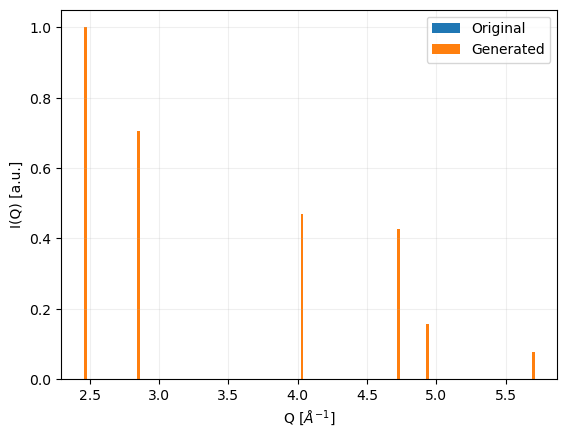


RMSD: 7.194657368560264e-05
HDD: 7.194657368560264e-05

------------------------------
RockSalt_ScO
------------------------------
Generation no. 1 :
2.3202,0.4290
2.6791,1.0000
3.7888,0.5837
4.4428,0.1771
4.6404,0.1771
5.3582,0.0777
data_Sc4O4
loop_
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Sc 1.3600 1.6000 0.8850
O 3.4400 0.6000 1.2600
_symmetry_space_group_name_H-M Fm-3m
_cell_length_a 4.6905
_cell_length_b 4.6905
_cell_length_c 4.6905
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 90.0000
_symmetry_Int_Tables_number 225
_chemical_formula_structural ScO
_chemical_formula_sum 'Sc4 O4'
_cell_volume 103.1323
_cell_formula_units_Z 4
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Sc Sc0 4 0.0000 0.0000 0.5000 1
O O1 4 0.0000 0.0000 0.0000 

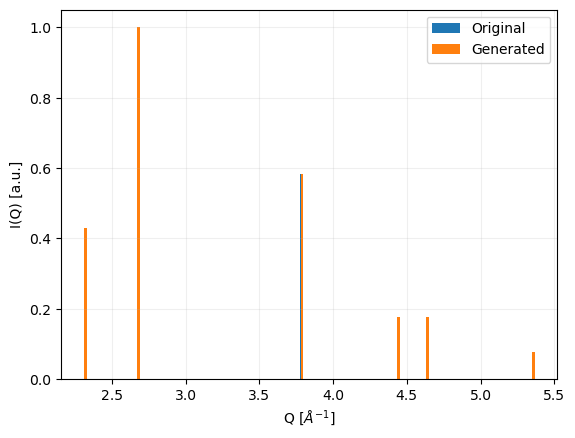


RMSD: 2.8621678829089666e-05
HDD: 2.8621678829089666e-05



In [12]:
config = SampleDefaults()
config.device = 'cuda'

config.model_dir = 'C-200K_cond_norm_scratch/'
config.dataset_dir = 'datasets/CHILI-3K_cond/'
config.split = 'val'

config.debug_max = 5
config.n_repeats = 1

config.top_k = 1
config.max_new_tokens = 3000
config.cond_window = 900

config.add_composition = True
config.add_spacegroup = True
config.fit_xrd = True
config.plot_xrd = True

if False:
    config.post_process = True
    config.out = "generation_out_test.tar.gz"
    config.individual_cifs = True

generate_samples(config)